In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, kendalltau
from cliffs_delta import cliffs_delta
from sklearn.preprocessing import StandardScaler

sns.set_theme(style="whitegrid", context='talk', palette='Greys')

## Correlation analysis

In [2]:
data = pd.read_csv("../data/bias_symptoms_raw.csv", index_col=[0, 1])

In [3]:
data.shape

(5930, 16)

In [4]:
sp = data.pop('statistical_parity')
eo = data.pop('equal_opportunity')
ao = data.pop('average_odds')

data.insert(len(data.columns), 'statistical_parity', sp)
data.insert(len(data.columns), 'equal_opportunity', eo)
data.insert(len(data.columns), 'average_odds', ao)

In [5]:
kendall = data.corr("kendall").round(3)
for col in kendall.columns:
    for col2 in kendall.columns:
        pval = kendalltau(data[col], data[col2])[1]
        if np.abs(kendall.loc[col, col2]) > 0.4:
            kendall.loc[col, col2] = r"\cellcolor{black!25}\textbf{" + str(kendall.loc[col, col2]) + "}"
        if pval > 0.05:
            kendall.loc[col, col2] = f"{kendall.loc[col, col2]}*"

C:\Users\giord\AppData\Local\Temp\ipykernel_9920\563120483.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '\cellcolor{black!25}\textbf{1.0}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  kendall.loc[col, col2] = r"\cellcolor{black!25}\textbf{" + str(kendall.loc[col, col2]) + "}"
C:\Users\giord\AppData\Local\Temp\ipykernel_9920\563120483.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.015*' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  kendall.loc[col, col2] = f"{kendall.loc[col, col2]}*"
C:\Users\giord\AppData\Local\Temp\ipykernel_9920\563120483.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.002*' has dtype incompatible with float64, p

In [6]:
kendall

,correlation_true,mutual_info,unpriv_prob_pos,priv_prob_pos,unpriv_unbalance,priv_unbalance,kurtosis_var,skew_var,gini,simpson,shannon,ir,pos_prob,statistical_parity,equal_opportunity,average_odds
correlation_true,\cellcolor{black!25}\textbf{1.0},0.015*,0.018,-0.109,-0.038,-0.071,-0.002*,0.015*,0.016*,0.026,0.025,0.001*,0.042,-0.022,-0.172,0.009*
mutual_info,0.015*,\cellcolor{black!25}\textbf{1.0},0.148,0.031,0.083,-0.007*,-0.29,-0.274,-0.275,0.275,0.272,0.295,0.341,0.022,0.017,0.018
unpriv_prob_pos,0.018,0.148,\cellcolor{black!25}\textbf{1.0},0.333,0.132,-0.001*,-0.12,-0.059,-0.055,\cellcolor{black!25}\textbf{0.571},\cellcolor{black!25}\textbf{0.566},0.125,0.105,0.062,0.005,0.059
priv_prob_pos,-0.109,0.031,0.333,\cellcolor{black!25}\textbf{1.0},-0.255,\cellcolor{black!25}\textbf{0.643},-0.155,-0.143,-0.146,0.356,0.354,0.157,-0.02,-0.326,0.008,-0.227
unpriv_unbalance,-0.038,0.083,0.132,-0.255,\cellcolor{black!25}\textbf{1.0},\cellcolor{black!25}\textbf{-0.428},-0.069,-0.001*,0.007*,0.026,0.027,0.069,-0.0*,0.346,-0.028,0.25
priv_unbalance,-0.071,-0.007*,-0.001*,\cellcolor{black!25}\textbf{0.643},\cellcolor{black!25}\textbf{-0.428},\cellcolor{black!25}\textbf{1.0},-0.104,-0.117,-0.118,0.093,0.092,0.105,-0.074,\cellcolor{black!25}\textbf{-0.45},0.004,-0.309
kurtosis_var,-0.002*,-0.29,-0.12,-0.155,-0.069,-0.104,\cellcolor{black!25}\textbf{1.0},\cellcolor{black!25}\textbf{0.837},\cellcolor{black!25}\textbf{0.824},-0.331,-0.321,\cellcolor{black!25}\textbf{-0.984},0.309,0.038,0.101,0.264
skew_var,0.015*,-0.274,-0.059,-0.143,-0.001*,-0.117,\cellcolor{black!25}\textbf{0.837},\cellcolor{black!25}\textbf{1.0},\cellcolor{black!25}\textbf{0.984},-0.277,-0.268,\cellcolor{black!25}\textbf{-0.836},0.262,0.048,0.082,0.328
gini,0.016*,-0.275,-0.055,-0.146,0.007*,-0.118,\cellcolor{black!25}\textbf{0.824},\cellcolor{black!25}\textbf{0.984},\cellcolor{black!25}\textbf{1.0},-0.28,-0.272,\cellcolor{black!25}\textbf{-0.834},0.254,0.056,0.083,0.335
simpson,0.026,0.275,\cellcolor{black!25}\textbf{0.571},0.356,0.026,0.093,-0.331,-0.277,-0.28,\cellcolor{black!25}\textbf{1.0},\cellcolor{black!25}\textbf{0.99},0.336,0.065,-0.033,-0.003,-0.047


In [5]:
kendall.to_latex('full_corr.tex', float_format="%.3f", escape=False)

## Distribution of the data

In [35]:
data = pd.read_csv("data/bias_symptoms.csv", index_col=[0, 1])

In [36]:
def plot_differences(symps, symp, symp_name):
    corr_high_sp = symps[symps["statistical_parity"] == 1][symp].values
    corr_low_sp = symps[symps["statistical_parity"] == 0][symp].values
    corr_high_eo = symps[symps["equal_opportunity"] == 1][symp].values
    corr_low_eo = symps[symps["equal_opportunity"] == 0][symp].values
    corr_high_ao = symps[symps["average_odds"] == 1][symp].values
    corr_low_ao = symps[symps["average_odds"] == 0][symp].values
    df = pd.DataFrame(
        {
            symp_name: [
                corr_high_sp,
                corr_low_sp,
                corr_high_eo,
                corr_low_eo,
                corr_high_ao,
                corr_low_ao,
            ],
            "Metric": [
                "Statistical Parity",
                "Statistical Parity",
                "Equal Opportunity",
                "Equal Opportunity",
                "Average Odds",
                "Average Odds",
            ],
            "Bias": ["High", "Low", "High", "Low", "High", "Low"],
        }
    )
    df = df.explode(symp_name)
    g = sns.FacetGrid(df, col="Metric", height=4, aspect=1)
    g.map(
        sns.barplot,
        "Bias",
        symp_name,
        "Bias",
        order=["Low", "High"],
        hue_order=["Low", "High"],
        palette=sns.color_palette()[1:4:2],
    )
    g.set_titles("{col_name}")
    g.add_legend()
    # g.facet_axis(0,0).set_xlabel("T test pvalue: "+str(ttest_ind(corr_high_sp, corr_low_sp, equal_var=False)[1]))
    # g.facet_axis(0,1).set_xlabel("T test pvalue: "+str(ttest_ind(corr_high_eo, corr_low_eo, equal_var=False)[1]))
    # g.facet_axis(0,2).set_xlabel("T test pvalue: "+str(ttest_ind(corr_high_ao, corr_low_ao, equal_var=False)[1]))
    g.set_axis_labels("", symp_name)
    # plt.savefig(f"figs/{symp_name}.pdf", bbox_inches="tight")
    # plt.show()
    print(ttest_ind(corr_high_sp, corr_low_sp, equal_var=False))
    print(ttest_ind(corr_high_eo, corr_low_eo, equal_var=False))
    print(ttest_ind(corr_high_ao, corr_low_ao, equal_var=False))
    print(cliffs_delta(corr_high_sp, corr_low_sp))
    print(cliffs_delta(corr_high_eo, corr_low_eo))
    print(cliffs_delta(corr_high_ao, corr_low_ao))
    return g

### Analysis of Mutual Information

TtestResult(statistic=12.763897120165883, pvalue=9.335723891740249e-37, df=5159.209999680623)
TtestResult(statistic=4.796240059729346, pvalue=1.6732552152631151e-06, df=4162.830437512064)
TtestResult(statistic=8.866616825916202, pvalue=1.0075508669268701e-18, df=5413.468198969153)
(0.25144217240408967, 'small')
(0.05276602090883331, 'negligible')
(0.16519336575120425, 'small')


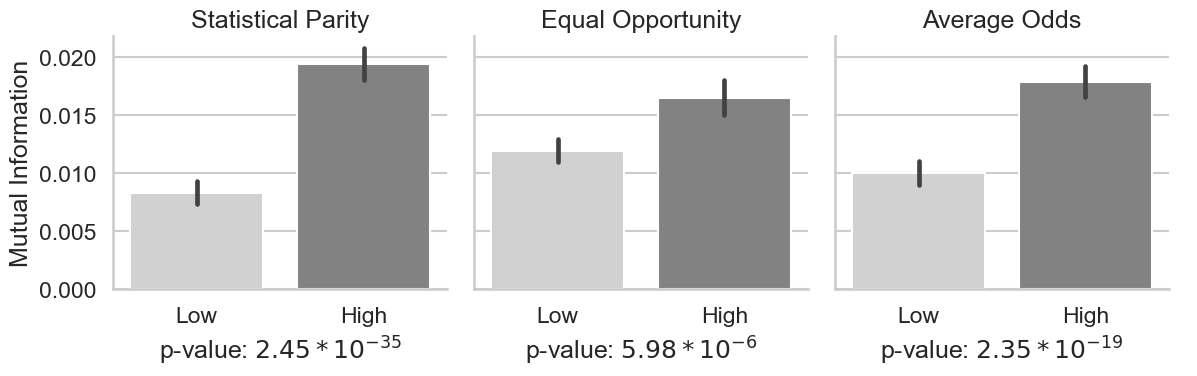

In [37]:
g = plot_differences(data, "mutual_info", "Mutual Information")
g.facet_axis(0, 0).set_xlabel(
    "p-value: $2.45*10^{-35}$", labelpad=5, fontdict={"fontsize": 18}
)
g.facet_axis(0, 1).set_xlabel(
    "p-value: $5.98*10^{-6}$", labelpad=5, fontdict={"fontsize": 18}
)
g.facet_axis(0, 2).set_xlabel(
    "p-value: $2.35*10^{-19}$", labelpad=5, fontdict={"fontsize": 18}
)
plt.savefig("figs/Mutual Information.pdf", bbox_inches="tight")
plt.show()

## Kendall's Tau

TtestResult(statistic=4.651459793604828, pvalue=3.379080481050427e-06, df=5110.235550465819)
TtestResult(statistic=1.6348618477556232, pvalue=0.10214231565563263, df=4894.685903632139)
TtestResult(statistic=2.1351714378419446, pvalue=0.032792801118427854, df=5292.006595537628)
(0.06837939390738224, 'negligible')
(0.0007678701922359925, 'negligible')
(0.028023423053215535, 'negligible')


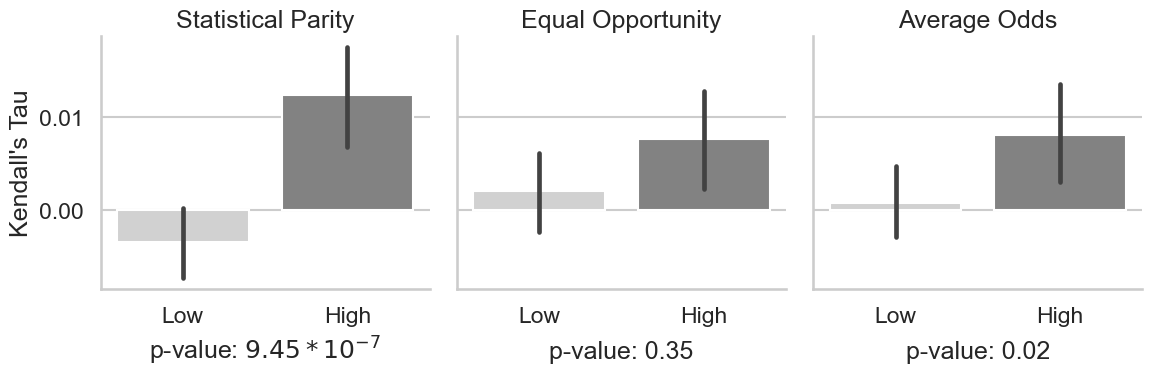

In [38]:
g = plot_differences(data, "correlation_true", "Kendall's Tau")

g.facet_axis(0,0).set_xlabel("p-value: $9.45*10^{-7}$", labelpad=5, fontdict={'fontsize': 18})
g.facet_axis(0, 1).set_xlabel(
    "p-value: 0.35", labelpad=10, fontdict={"fontsize": 18}
)
g.facet_axis(0, 2).set_xlabel(
    "p-value: 0.02", labelpad=10, fontdict={"fontsize": 18}
)
plt.savefig("figs/Kendall's Tau.pdf", bbox_inches="tight")
plt.show()

## Metrics Distribution

In [39]:
distr = pd.DataFrame(
    [
        {
            "Statistical Parity": [
              data[data["statistical_parity"] == 0].shape[0]/data.shape[0],
              data[data["statistical_parity"] == 1].shape[0]/data.shape[0],
            ],
            "Equal Opportunity": [
              data[data["equal_opportunity"] == 0].shape[0]/data.shape[0],
              data[data["equal_opportunity"] == 1].shape[0]/data.shape[0],
            ],
            "Average Odds": [
              data[data["average_odds"] == 0].shape[0]/data.shape[0],
              data[data["average_odds"] == 1].shape[0]/data.shape[0],
            ],
            "Bias": ["Low", "High"]
        }
    ]
)

In [40]:
distr = distr.explode(['Statistical Parity', 'Equal Opportunity', 'Average Odds', 'Bias']).melt(id_vars='Bias', var_name='Metric', value_name='Percentage')

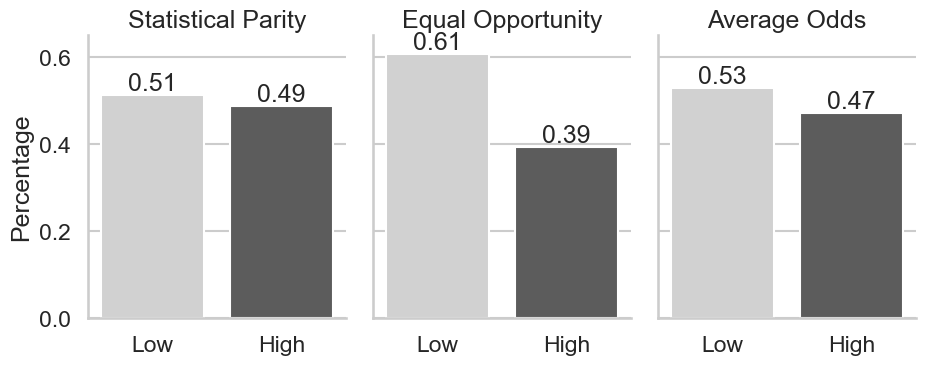

In [42]:
g = sns.catplot(
    data=distr,
    col="Metric",
    x="Bias",
    y="Percentage",
    kind="bar",
    hue="Bias",
    palette=sns.color_palette()[1:5:3],
    height=4,
    aspect=0.8,
)


for i in range(3):
    g.facet_axis(0, i).bar_label(g.facet_axis(0, i).containers[0], fmt="%.2f")
    g.facet_axis(0, i).bar_label(g.facet_axis(0, i).containers[1], fmt="%.2f")

g.set_titles("{col_name}")
# plt.subplots_adjust(top=1.3)
g.set_axis_labels("")
plt.ylim(0,0.65)
plt.tight_layout()
plt.savefig('metrics_distr.png', dpi=300, bbox_inches='tight')
plt.savefig("figs/metrics_distr.pdf", bbox_inches="tight")
plt.show()

## Distribution of SP, EO and AO

In [43]:
raw = pd.read_csv("data/bias_symptoms_raw.csv", index_col=[0, 1])
metrics = raw[['statistical_parity', 'equal_opportunity', 'average_odds']]
metrics = pd.melt(metrics, var_name='Metric', value_name='Value')
metrics['Metric'] = metrics['Metric'].map({'statistical_parity': 'Statistical Parity', 'equal_opportunity': 'Equal Opportunity', 'average_odds': 'Average Odds'})
metrics['Value'] = metrics['Value'].abs()

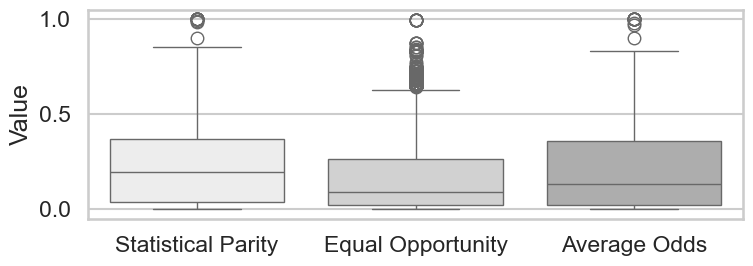

In [44]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.boxplot(data=metrics, x='Metric', y='Value', hue='Metric')
plt.xlabel('')
plt.tight_layout()
plt.savefig('figs/metrics_boxplot.pdf', bbox_inches='tight')
plt.show()